In [1]:
import numpy as np
import os
import pickle as pkl
import sys
sys.path.append('../bin/')
from load_data import *
from estimate_covariance import *

In [2]:
input_data = 'mnist'
num_classes= 10
masking    = False
mode       = 'ML'
covpath    = '../outputs/%s/covariance_estimator/'%input_data
data_num   = 60000
tag        = 'Gaussian_mnist'
outpath    = '../data/%s/'%tag

In [4]:
if masking:
    label = 'masked'
else:
    label = 'inpainted'

outfile = '%s_%s.pkl'%(mode,label)
outfile = os.path.join(outpath,outfile)
print(outfile)

if not os.path.isdir(outpath):
    os.mkdir(outpath)

../data/Gaussian_mnist/ML_inpainted.pkl


In [54]:
covs=[]
data=[]
means=[]
for ii in range(num_classes):
    if masking:
        filename = os.path.join(covpath,'cov_estimate_%s_%d_masked.pkl'%(mode,ii))
    else:   
        filename = os.path.join(covpath,'cov_estimate_%s_%d.pkl'%(mode,ii))
    cov = pkl.load(open(filename, 'rb'))
    R   = cov.R
    var = cov.vars
    mean= cov.mean
    d, c = create_Gaussian_data(R,var,mean,data_num//num_classes, cov.cov)
    data.append(d)
    covs.append(c)
    means.append(mean)

7.00421829215e-16
1.0
7.39131369801e-16
0.999999999999
4.09935600787e-16
1.0
3.94109422215e-16
0.999999999994
4.11825472261e-16
1.0
6.19452486149e-16
1.0
6.02642645557e-16
1.0
4.93123883738e-16
1.0
3.83854788617e-16
1.0
5.10686494632e-16
0.999999999999


In [55]:
def create_Gaussian_data(R, eigs, means, data_num, cc):
    data_dim = len(eigs)
    print(min(eigs))
    ind  = np.where(cc!=0)
    cov  = np.dot(np.dot(R.T,np.diag(eigs)),R)
    cov=(cov+cov.T)/2.
    print(np.mean(cov[ind]/cc[ind]))
    L    = lg.cholesky(cov,lower=True)
    data = np.random.randn((data_dim*data_num)).reshape((data_num, data_dim))
    data = np.einsum('ij,kj->ki',L,data)+means
    return data, cov

In [59]:
if not os.path.isfile(outfile):
    pkl.dump([np.asarray(data),covs, means],open(outfile,'wb'))

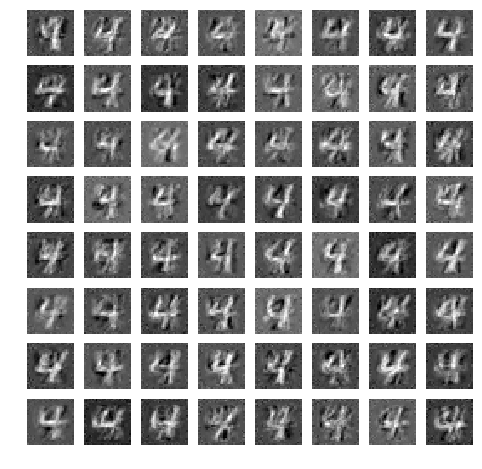

True

In [57]:
from make_figures import *
make_plots(data[4], input_data)